In [18]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_json('round-1to2-by-provinces.json')
df2 = pd.read_json('timeline-cases-by-provinces.json')

In [3]:
df1.head(5)

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN


In [4]:
df2.head(5)

,txn_date,province,new_case,total_case,update_date
0,2021-04-01,กระบี่,0,27,2021-08-20 07:39:03
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-20 07:39:03
2,2021-04-01,กาญจนบุรี,0,16,2021-08-20 07:39:03
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-20 07:39:03
4,2021-04-01,กำแพงเพชร,0,2,2021-08-20 07:39:03


In [15]:
frames = [df1, df2]
df1_2 = pd.concat(frames)
df1_2

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


In [16]:
daily = df1_2.groupby(["txn_date"]).sum()
daily

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6
...,...,...
2021-08-16,21157,928314
2021-08-17,20128,948442
2021-08-18,20515,968957


In [17]:
bkk = df1_2[df1_2['province'] == "กรุงเทพมหานคร"]
bkk_daily = bkk.groupby(["txn_date"]).sum()
bkk_daily

,new_case,total_case
txn_date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,1,3
2020-01-24,0,3
2020-01-25,1,4
...,...,...
2021-08-16,4337,245126
2021-08-17,4404,249530
2021-08-18,4165,253695


<AxesSubplot:title={'center':'Daily cases of Thailand'}, xlabel='Date', ylabel='Cases'>

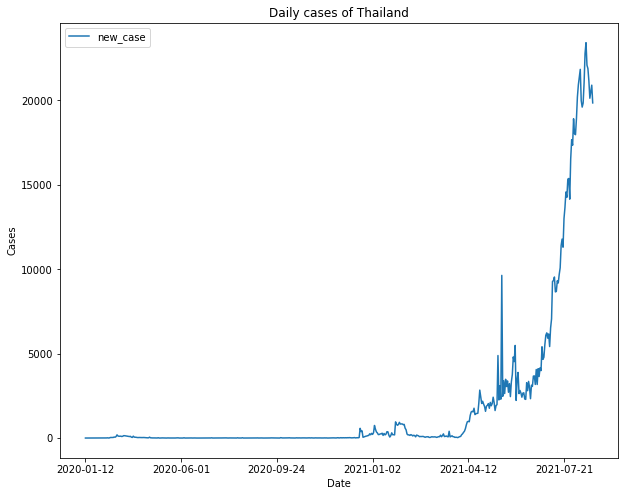

In [20]:
daily.plot(y = 'new_case', figsize = (10, 8), xlabel = "Date", ylabel = "Cases", title = "Daily cases of Thailand")

<AxesSubplot:title={'center':'Daily cases of Bangkok'}, xlabel='Date', ylabel='Cases'>

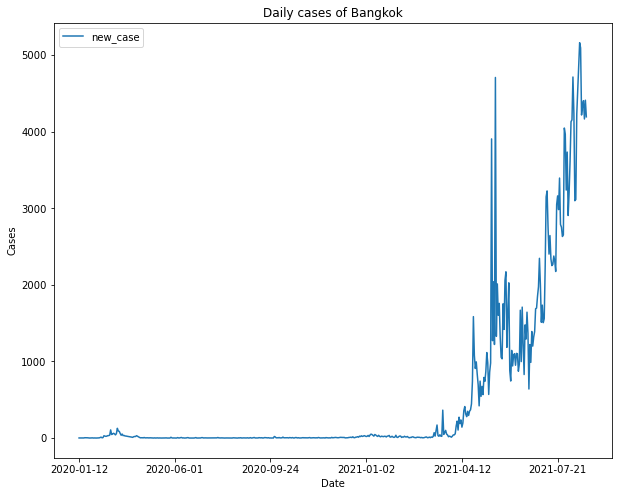

In [21]:
bkk_daily.plot(y = 'new_case', figsize = (10, 8), xlabel = "Date", ylabel = "Cases", title = "Daily cases of Bangkok")

In [27]:
daily_apr = df1_2[df1_2['txn_date'] >= '2021-04-01']
daily_apr1 = daily_apr.groupby(["txn_date"]).sum()
daily_apr1

,new_case,total_case
txn_date,,
2021-04-01,26,28889
2021-04-02,58,28947
2021-04-03,84,29031
2021-04-04,96,29127
2021-04-05,194,29321
...,...,...
2021-08-16,21157,928314
2021-08-17,20128,948442
2021-08-18,20515,968957


In [28]:
bkk_apr = bkk[bkk['txn_date'] >= '2021-04-01']
bkk_apr1 = bkk_apr.groupby(["txn_date"]).sum()
bkk_apr1

,new_case,total_case
txn_date,,
2021-04-01,11,4855
2021-04-02,24,4879
2021-04-03,41,4920
2021-04-04,41,4961
2021-04-05,55,5016
...,...,...
2021-08-16,4337,245126
2021-08-17,4404,249530
2021-08-18,4165,253695


<AxesSubplot:title={'center':'Daily cases of Thailand from April 2021'}, xlabel='Date', ylabel='Cases'>

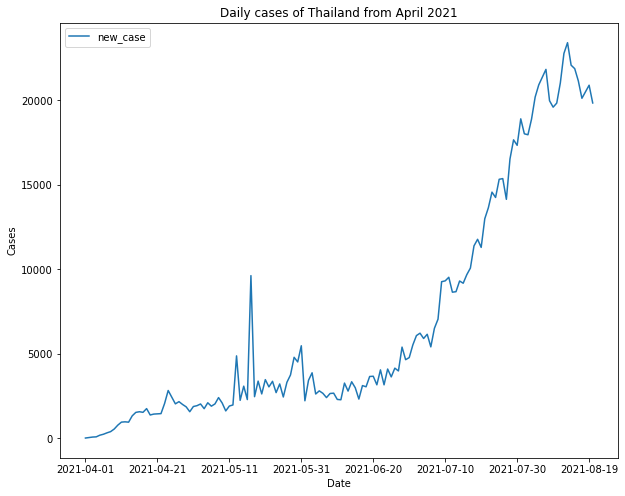

In [30]:
daily_apr1.plot(y = 'new_case', figsize = (10, 8), xlabel = "Date", ylabel = "Cases", title = "Daily cases of Thailand from April 2021")

<AxesSubplot:title={'center':'Daily cases of Bangkok from April 2021'}, xlabel='Date', ylabel='Cases'>

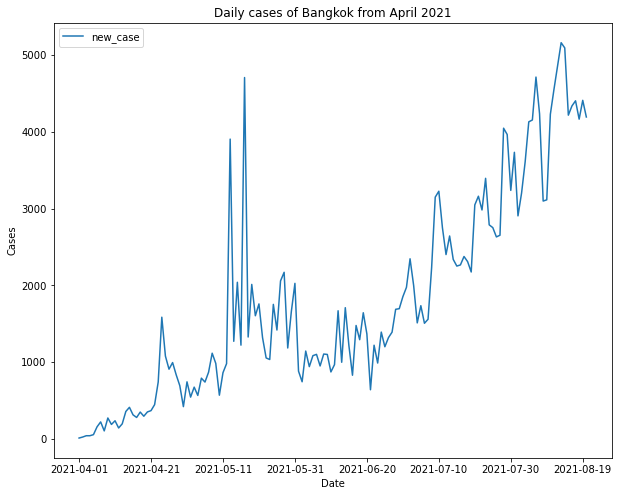

In [32]:
bkk_apr1.plot(y = 'new_case', figsize = (10, 8), xlabel = "Date", ylabel = "Cases", title = "Daily cases of Bangkok from April 2021")